In [1]:
from metric_analysis import labels, subgroup_fairness_analysis
label = 0    # No finding
# label = 10 # Pleural effusion
print(labels[label])


No Finding


Number of Male cases: 62024
Number of Female cases: 52696
Number of White cases: 38174
Number of Asian cases: 38220
Number of Black cases: 38326
Number of cases aged 0-20: 671
Number of cases aged 20-40: 11131
Number of cases aged 40-60: 31864
Number of cases aged 60-80: 49108
Number of cases aged 80 and older: 21946
All 	 Threshold 0.0822
All	TPR 0.80 | FPR 0.20 | AUC 0.87
White	TPR 0.79 | FPR 0.19 | AUC 0.87
Asian	TPR 0.77 | FPR 0.21 | AUC 0.85
Black	TPR 0.84 | FPR 0.20 | AUC 0.89
Female	TPR 0.76 | FPR 0.20 | AUC 0.85
Male	TPR 0.83 | FPR 0.20 | AUC 0.88
All	AP 0.42
White	AP 0.43
Asian	AP 0.37
Black	AP 0.47
Female	AP 0.39
Male	AP 0.45


/vol/aimspace/users/ngq/Towards-Fair-and-Private-AI-in-Chest-Radiograph-Analysis/metrics/metric_analysis.py:276: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(ap_values.keys(), rotation=45, ha='right')  # You can adjust the rotation angle and alignment


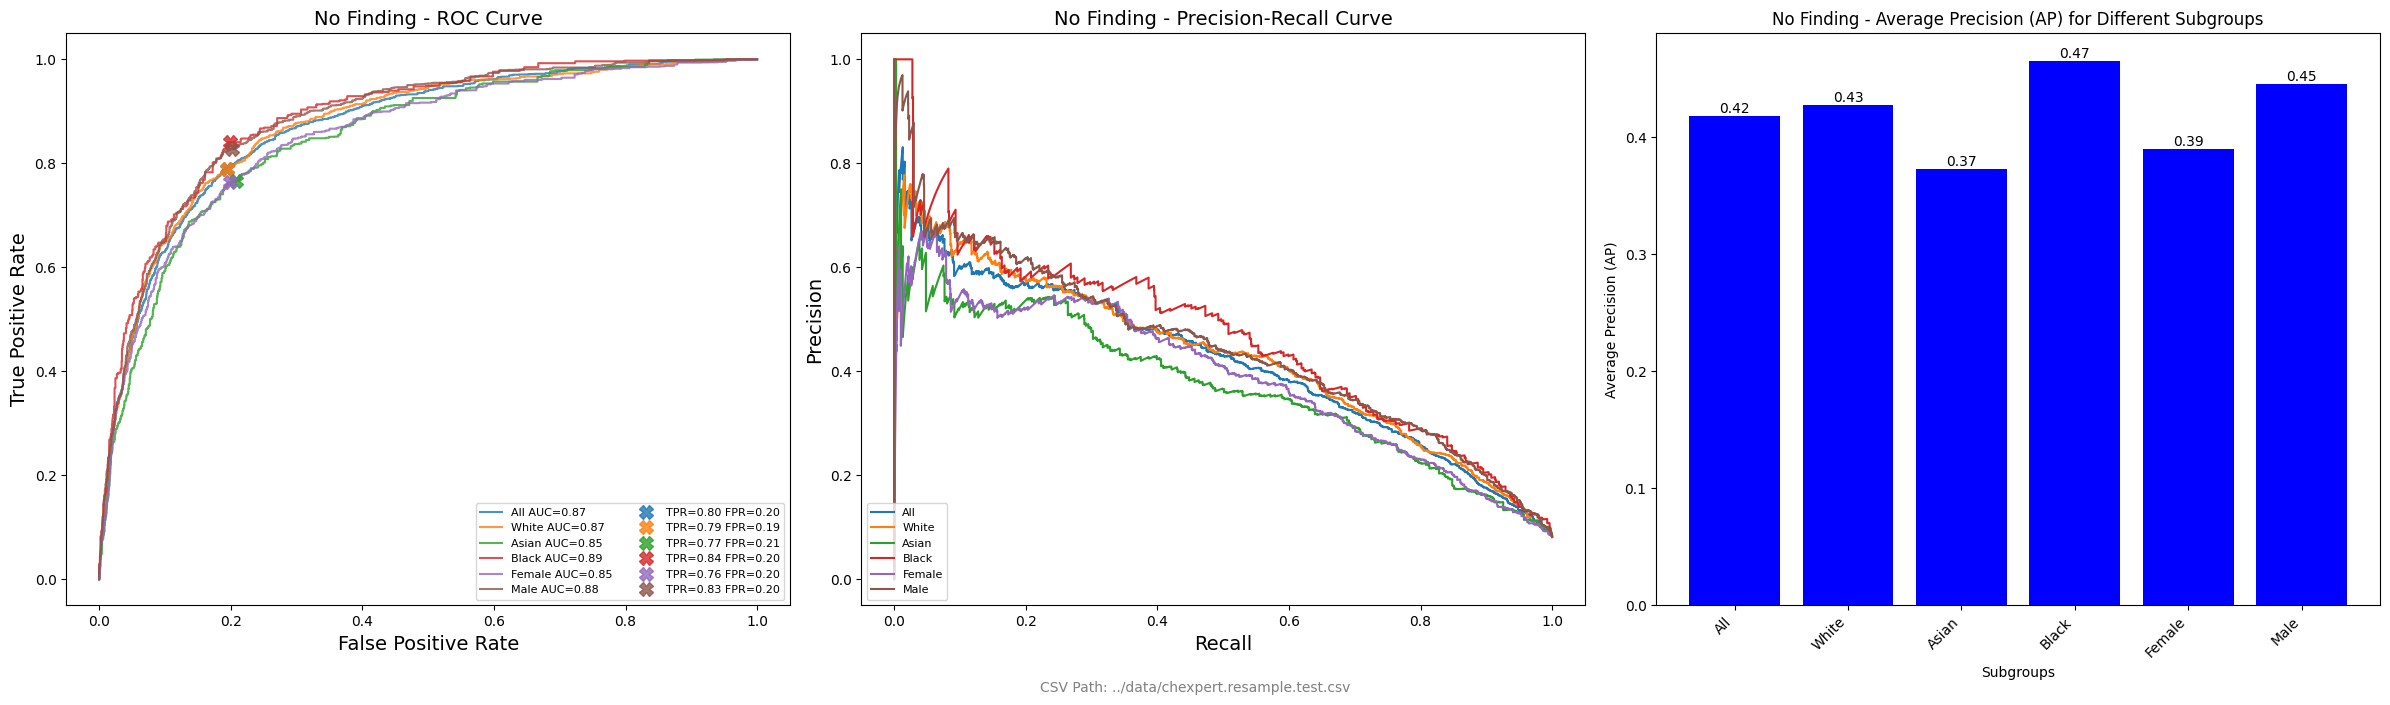

{'All': {'TPR': 0.7981934112646121,
  'FPR': 0.1999620169024784,
  'AUC': 0.8692784926966798,
  'AP': 0.41849565093971214},
 'White': {'TPR': 0.788339670468948,
  'FPR': 0.1941858472785425,
  'AUC': 0.8717005018820305,
  'AP': 0.42740077481291144},
 'Asian': {'TPR': 0.7662007623888183,
  'FPR': 0.20745894160583944,
  'AUC': 0.8503404541117521,
  'AP': 0.37246323962898875},
 'Black': {'TPR': 0.8406310367031552,
  'FPR': 0.19823963657013066,
  'AUC': 0.8875686193635955,
  'AP': 0.46555566558814293},
 'Female': {'TPR': 0.7642332415059688,
  'FPR': 0.19820024824162186,
  'AUC': 0.8527853144982758,
  'AP': 0.38969102445559634},
 'Male': {'TPR': 0.8274633953304313,
  'FPR': 0.2014569071441109,
  'AUC': 0.8827121919151694,
  'AP': 0.44556465972655224}}

In [2]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert_new/disease/batch_150_epochs_20resnet-all/', 'predictions.resample.test.csv' )

Number of Male cases: 62024
Number of Female cases: 52696
Number of White cases: 38174
Number of Asian cases: 38220
Number of Black cases: 38326
Number of cases aged 0-20: 671
Number of cases aged 20-40: 11131
Number of cases aged 40-60: 31864
Number of cases aged 60-80: 49108
Number of cases aged 80 and older: 21946
All 	 Threshold 0.0520
All	TPR 0.79 | FPR 0.20 | AUC 0.87
White	TPR 0.81 | FPR 0.21 | AUC 0.87
Asian	TPR 0.73 | FPR 0.19 | AUC 0.85
Black	TPR 0.84 | FPR 0.20 | AUC 0.88
Female	TPR 0.76 | FPR 0.19 | AUC 0.85
Male	TPR 0.83 | FPR 0.21 | AUC 0.88
All	AP 0.42
White	AP 0.43
Asian	AP 0.36
Black	AP 0.49
Female	AP 0.41
Male	AP 0.44


/vol/aimspace/users/ngq/Towards-Fair-and-Private-AI-in-Chest-Radiograph-Analysis/metrics/metric_analysis.py:276: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(ap_values.keys(), rotation=45, ha='right')  # You can adjust the rotation angle and alignment


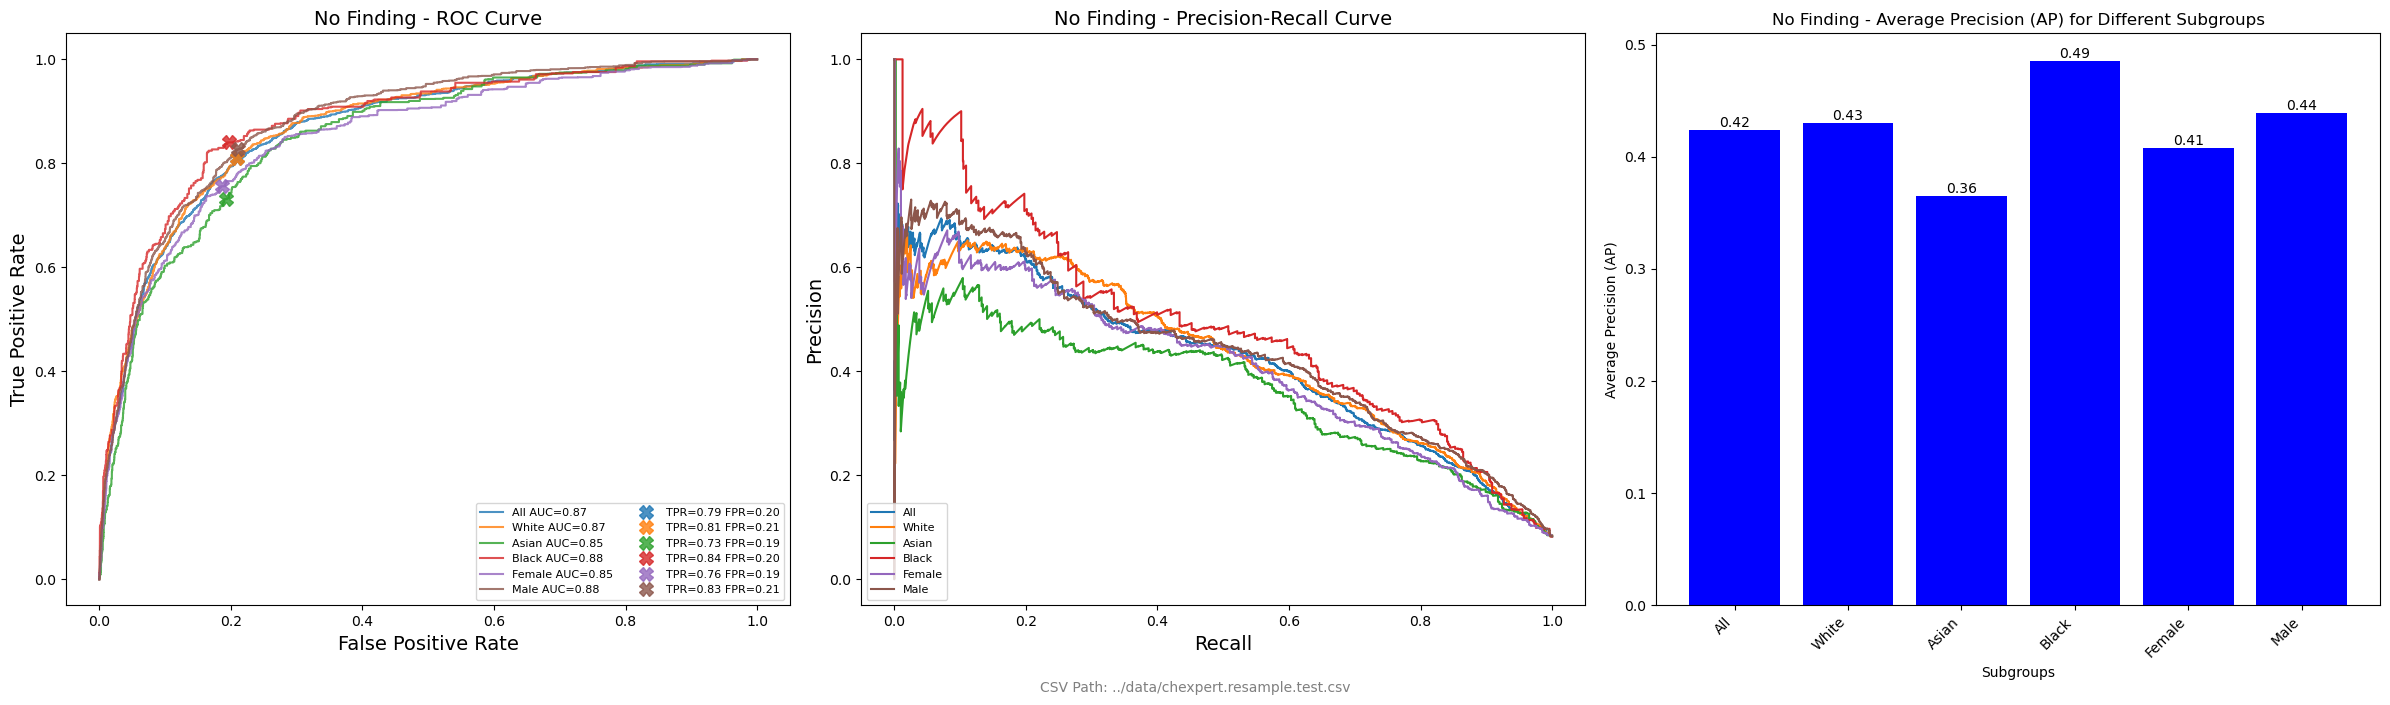

In [6]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert_new/disease/batch_256_epochs_100_0.001_nonli-resnet-all/', 'predictions.resample.test.csv' )

#DISEASE CLASSIFIFCATION

Number of Male cases: 62024
Number of Female cases: 52696
Number of White cases: 38174
Number of Asian cases: 38220
Number of Black cases: 38326
Number of cases aged 0-20: 671
Number of cases aged 20-40: 11131
Number of cases aged 40-60: 31864
Number of cases aged 60-80: 49108
Number of cases aged 80 and older: 21946
All 	 Threshold 0.0815
All	TPR 0.63 | FPR 0.20 | AUC 0.79
White	TPR 0.68 | FPR 0.22 | AUC 0.80
Asian	TPR 0.57 | FPR 0.19 | AUC 0.77
Black	TPR 0.66 | FPR 0.19 | AUC 0.80
Female	TPR 0.54 | FPR 0.15 | AUC 0.77
Male	TPR 0.72 | FPR 0.24 | AUC 0.81
All	AP 0.28
White	AP 0.29
Asian	AP 0.25
Black	AP 0.29
Female	AP 0.26
Male	AP 0.30


/vol/aimspace/users/ngq/Towards-Fair-and-Private-AI-in-Chest-Radiograph-Analysis/metrics/metric_analysis.py:278: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(ap_values.keys(), rotation=45, ha='right')  # You can adjust the rotation angle and alignment


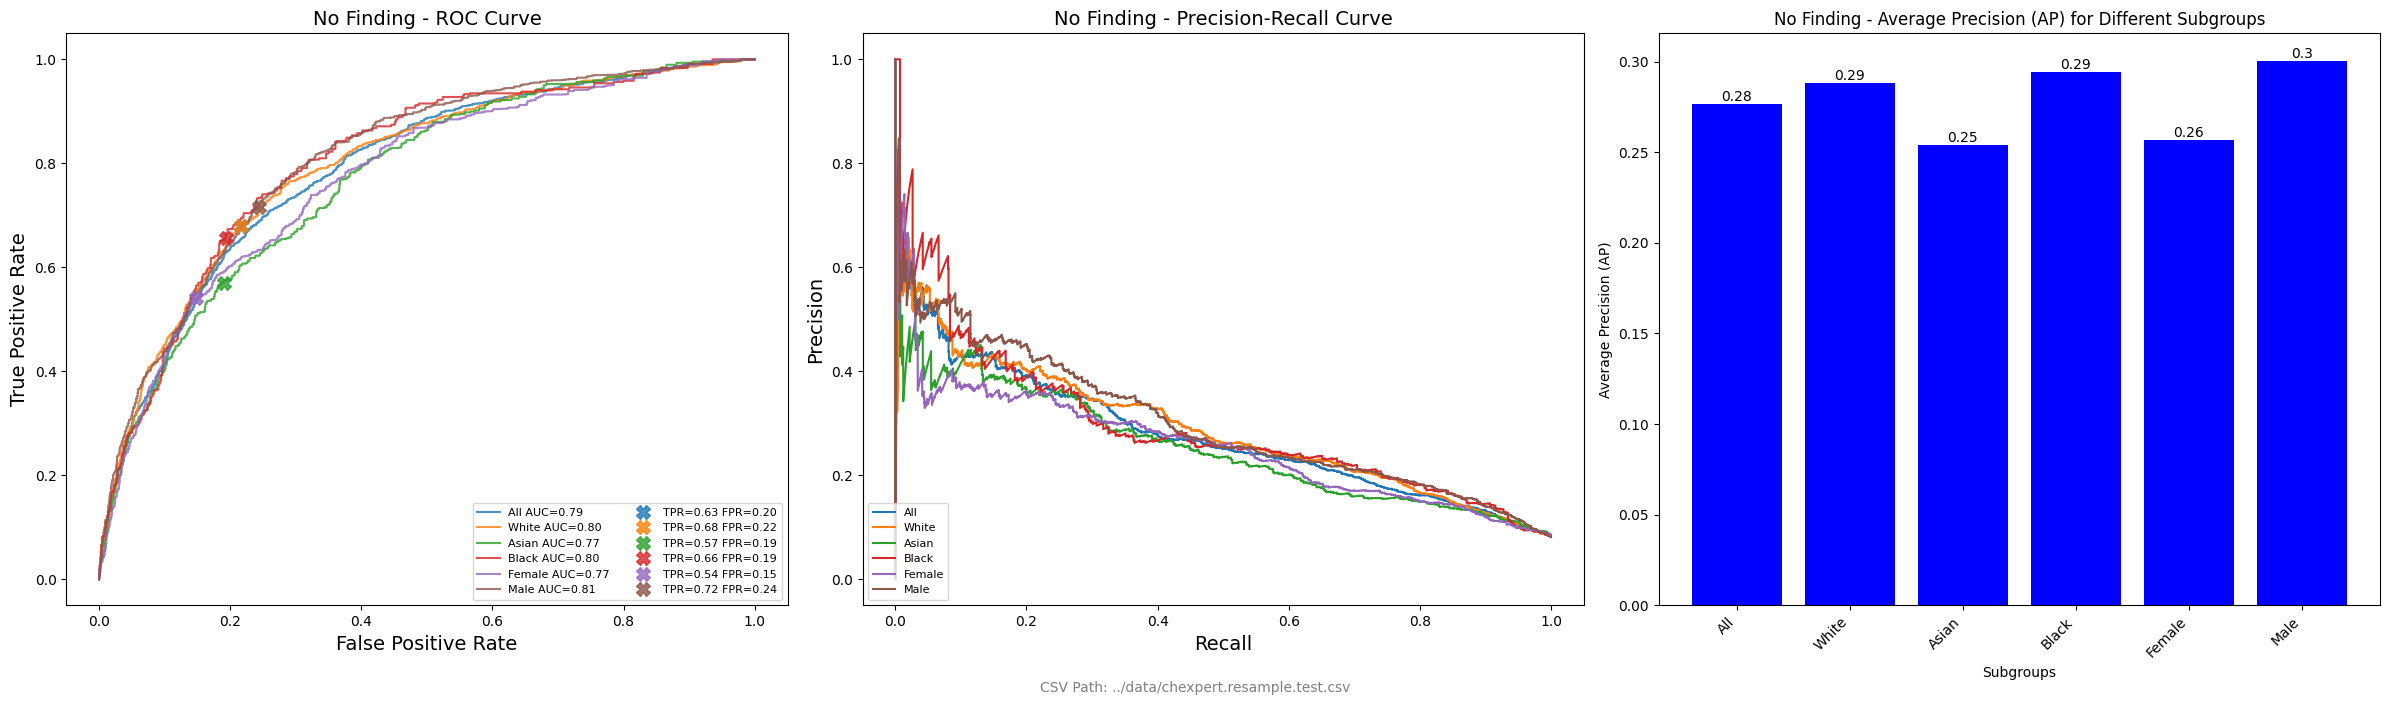

{'All': {'TPR': 0.6348565356004251,
  'FPR': 0.20008546196942356,
  'AUC': 0.7897923705035212,
  'AP': 0.27689966290353274},
 'White': {'TPR': 0.6790240811153359,
  'FPR': 0.217031241076018,
  'AUC': 0.7965703777836218,
  'AP': 0.2880860465182854},
 'Asian': {'TPR': 0.5702033036848793,
  'FPR': 0.18980953467153283,
  'AUC': 0.7705981421989632,
  'AP': 0.25402713622010764},
 'Black': {'TPR': 0.6555054732775274,
  'FPR': 0.19346961953435549,
  'AUC': 0.8039926752383053,
  'AP': 0.2942181897820664},
 'Female': {'TPR': 0.5401744719926538,
  'FPR': 0.14844848986346715,
  'AUC': 0.773608057480815,
  'AP': 0.2565411045221522},
 'Male': {'TPR': 0.7164622081519588,
  'FPR': 0.24390029840266803,
  'AUC': 0.8091549548186588,
  'AP': 0.3006096563630831}}

In [3]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert_new/diseasedp/batch_4096_epochs_100_lr_0.001_target_epsilon_0.2_target delta_1.3122498523718916e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

Number of Male cases: 62024
Number of Female cases: 52696
Number of White cases: 38174
Number of Asian cases: 38220
Number of Black cases: 38326
Number of cases aged 0-20: 671
Number of cases aged 20-40: 11131
Number of cases aged 40-60: 31864
Number of cases aged 60-80: 49108
Number of cases aged 80 and older: 21946
All 	 Threshold 0.0602
All	TPR 0.61 | FPR 0.20 | AUC 0.78
White	TPR 0.67 | FPR 0.22 | AUC 0.79
Asian	TPR 0.57 | FPR 0.18 | AUC 0.77
Black	TPR 0.58 | FPR 0.20 | AUC 0.79
Female	TPR 0.48 | FPR 0.14 | AUC 0.77
Male	TPR 0.72 | FPR 0.25 | AUC 0.81
All	AP 0.26
White	AP 0.28
Asian	AP 0.26
Black	AP 0.26
Female	AP 0.25
Male	AP 0.28


/vol/aimspace/users/ngq/Towards-Fair-and-Private-AI-in-Chest-Radiograph-Analysis/metrics/metric_analysis.py:278: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(ap_values.keys(), rotation=45, ha='right')  # You can adjust the rotation angle and alignment


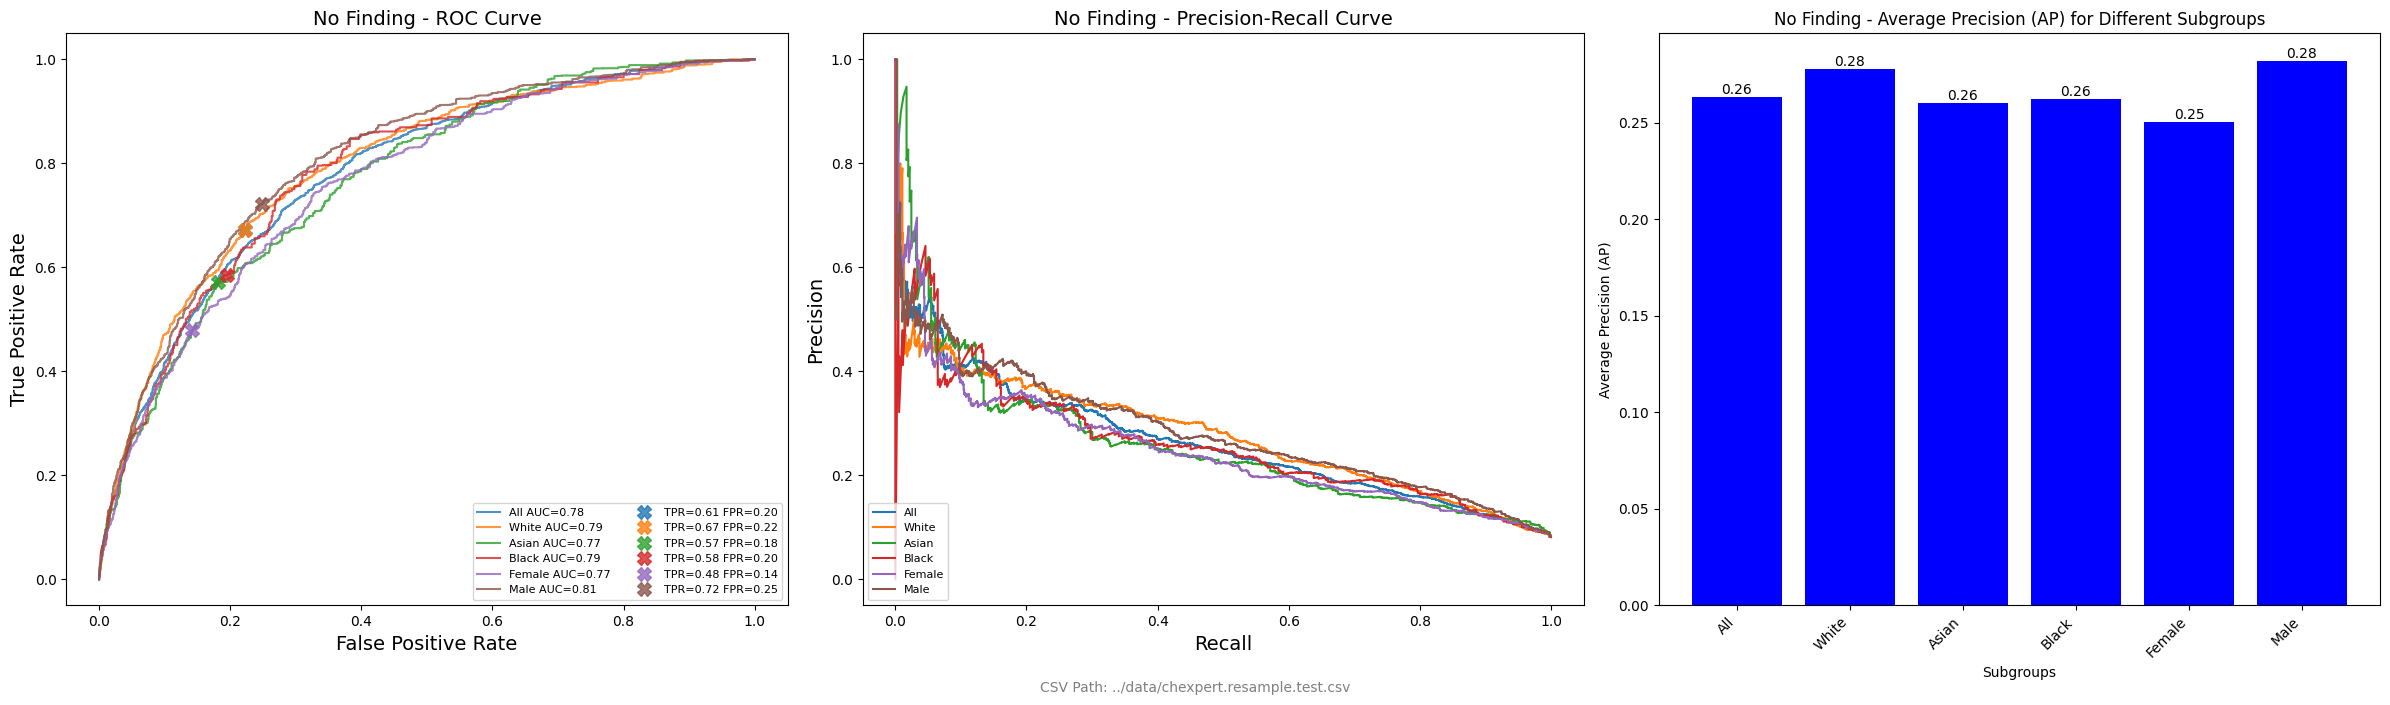

{'All': {'TPR': 0.6096705632306058,
  'FPR': 0.1999620169024784,
  'AUC': 0.7826060633092663,
  'AP': 0.2636195652975373},
 'White': {'TPR': 0.6723700887198986,
  'FPR': 0.2226569192986464,
  'AUC': 0.7936335620551038,
  'AP': 0.27810265536119105},
 'Asian': {'TPR': 0.5717916137229987,
  'FPR': 0.1817119069343066,
  'AUC': 0.7700866512975449,
  'AP': 0.2602026490362742},
 'Black': {'TPR': 0.5843528654217643,
  'FPR': 0.1955706984667802,
  'AUC': 0.7872591763372755,
  'AP': 0.2623073261788335},
 'Female': {'TPR': 0.47910927456382,
  'FPR': 0.14224244931733554,
  'AUC': 0.7656669375516932,
  'AP': 0.25067240629209764},
 'Male': {'TPR': 0.7222002374356945,
  'FPR': 0.24893803756362998,
  'AUC': 0.8055426772635421,
  'AP': 0.2823402461990515}}

In [4]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert_new/diseasedp/batch_4096_epochs_150_lr_0.001_target_epsilon_0.1_target delta_1.3122498523718916e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

Number of Male cases: 62024
Number of Female cases: 52696
Number of White cases: 38174
Number of Asian cases: 38220
Number of Black cases: 38326
Number of cases aged 0-20: 671
Number of cases aged 20-40: 11131
Number of cases aged 40-60: 31864
Number of cases aged 60-80: 49108
Number of cases aged 80 and older: 21946
All 	 Threshold 0.0780
All	TPR 0.51 | FPR 0.20 | AUC 0.72
White	TPR 0.55 | FPR 0.22 | AUC 0.74
Asian	TPR 0.43 | FPR 0.18 | AUC 0.70
Black	TPR 0.55 | FPR 0.20 | AUC 0.74
Female	TPR 0.42 | FPR 0.17 | AUC 0.69
Male	TPR 0.58 | FPR 0.23 | AUC 0.75
All	AP 0.20
White	AP 0.21
Asian	AP 0.19
Black	AP 0.21
Female	AP 0.18
Male	AP 0.22


/vol/aimspace/users/ngq/Towards-Fair-and-Private-AI-in-Chest-Radiograph-Analysis/metrics/metric_analysis.py:278: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(ap_values.keys(), rotation=45, ha='right')  # You can adjust the rotation angle and alignment


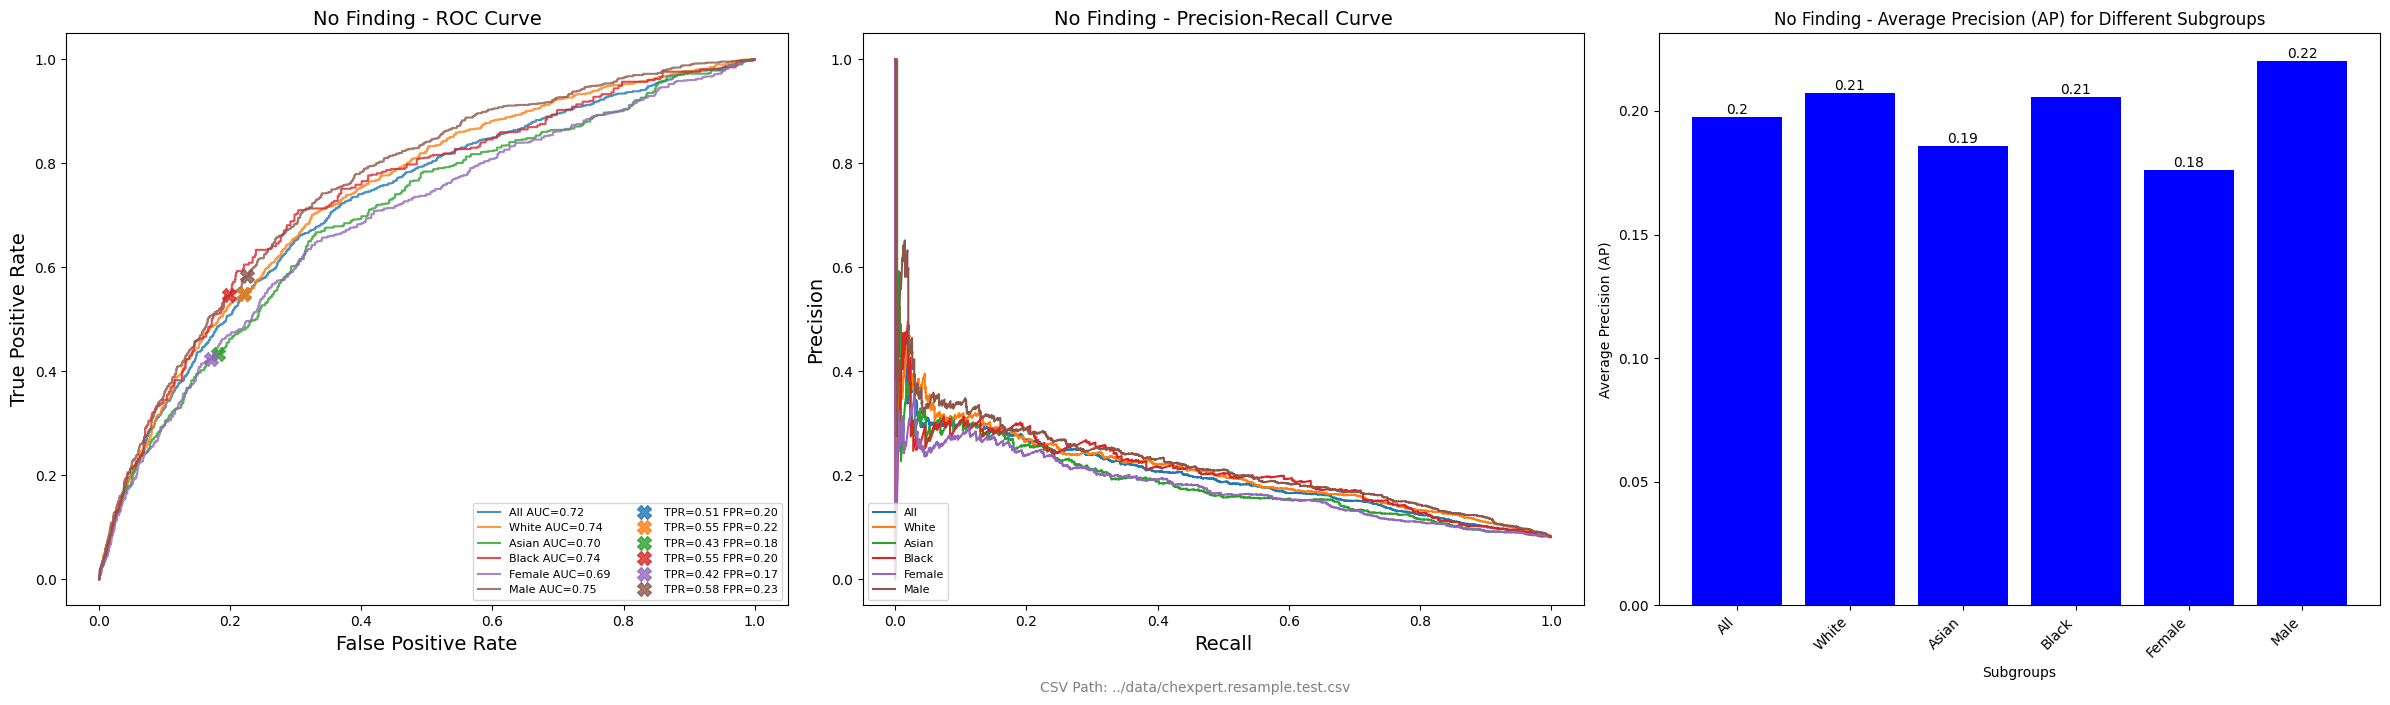

{'All': {'TPR': 0.5091392136025504,
  'FPR': 0.20000949577438043,
  'AUC': 0.7218797536265331,
  'AP': 0.19759875471138116},
 'White': {'TPR': 0.5481622306717364,
  'FPR': 0.22042949340339257,
  'AUC': 0.7370580907476083,
  'AP': 0.207260644110097},
 'Asian': {'TPR': 0.4332909783989835,
  'FPR': 0.18114165145985406,
  'AUC': 0.6956166936167326,
  'AP': 0.18578484136154136},
 'Black': {'TPR': 0.5463618802318094,
  'FPR': 0.19849517319704713,
  'AUC': 0.736527074962164,
  'AP': 0.20578203822504304},
 'Female': {'TPR': 0.42355371900826444,
  'FPR': 0.1701075713694663,
  'AUC': 0.6879292796319915,
  'AP': 0.17623980911931908},
 'Male': {'TPR': 0.5829046299960428,
  'FPR': 0.22538177988414954,
  'AUC': 0.7543922738166611,
  'AP': 0.2203712517759739}}

In [4]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert_new/diseasedp/batch_4096_epochs_100_lr_0.001_target_epsilon_0.1_target delta_1.3122498523718916e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

Number of Male cases: 62024
Number of Female cases: 52696
Number of White cases: 38174
Number of Asian cases: 38220
Number of Black cases: 38326
Number of cases aged 0-20: 671
Number of cases aged 20-40: 11131
Number of cases aged 40-60: 31864
Number of cases aged 60-80: 49108
Number of cases aged 80 and older: 21946
All 	 Threshold 0.0552
All	TPR 0.66 | FPR 0.20 | AUC 0.81
White	TPR 0.71 | FPR 0.21 | AUC 0.81
Asian	TPR 0.60 | FPR 0.19 | AUC 0.78
Black	TPR 0.66 | FPR 0.19 | AUC 0.82
Female	TPR 0.56 | FPR 0.16 | AUC 0.79
Male	TPR 0.74 | FPR 0.24 | AUC 0.83
All	AP 0.30
White	AP 0.30
Asian	AP 0.26
Black	AP 0.33
Female	AP 0.28
Male	AP 0.32


/vol/aimspace/users/ngq/Towards-Fair-and-Private-AI-in-Chest-Radiograph-Analysis/metrics/metric_analysis.py:276: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(ap_values.keys(), rotation=45, ha='right')  # You can adjust the rotation angle and alignment


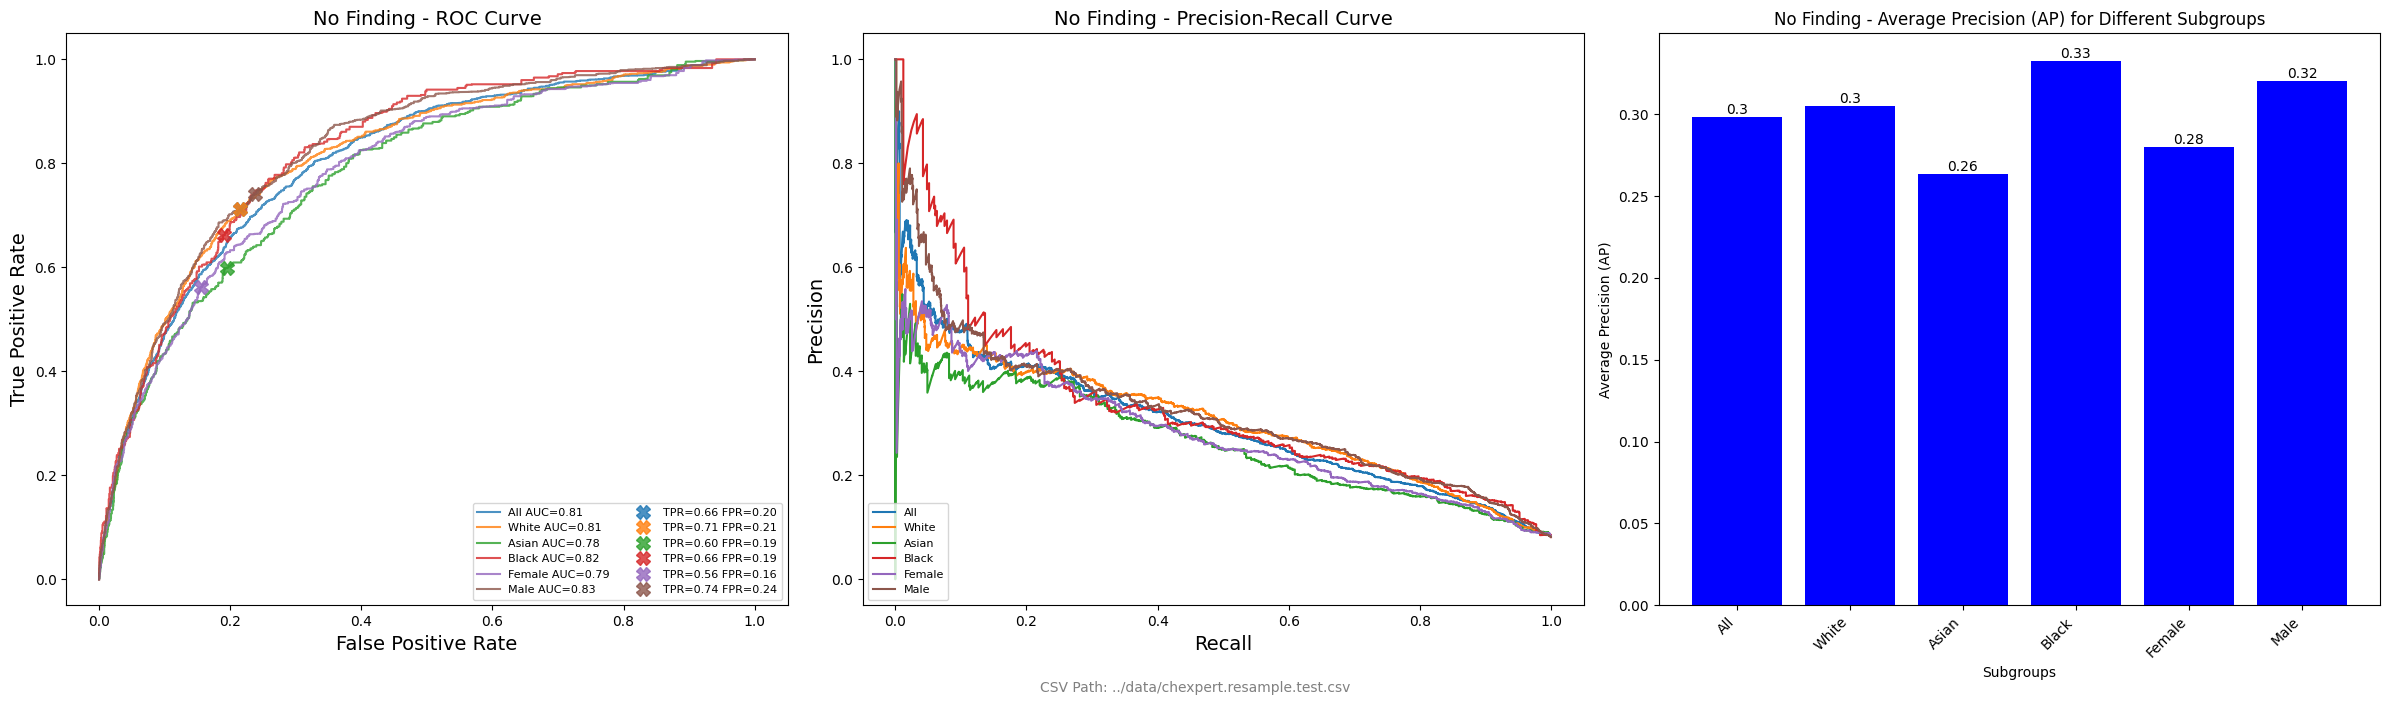

In [6]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert_new/diseasedp/batch_4096_epochs_100_lr_0.001_target_epsilon_0.4_target delta_1.3122498523718916e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

In [7]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert_new/diseasedp/batch_4096_epochs_100_lr_0.001_target_epsilon_1.0_target delta_1.3122498523718916e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

FileNotFoundError: [Errno 2] No such file or directory: '../disease/chexpert_new/diseasedp/batch_4096_epochs_100_lr_0.001_target_epsilon_0.8_target delta_1.3122498523718916e-05_max grad norm_1.2_nonli-resnetdp-all/predictions.resample.test.csv'

In [6]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert_new/diseasedp/batch_4096_epochs_100_lr_0.001_target_epsilon_8.0_target delta_1.3122498523718916e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

FileNotFoundError: [Errno 2] No such file or directory: '../disease/chexpert_new/diseasedp/batch_4096_epochs_100_lr_0.001_target_epsilon_0.8_target delta_1.3122498523718916e-05_max grad norm_8.0_nonli-resnetdp-all/predictions.resample.test.csv'

In [ ]:
subgroup_fairness_analysis(10,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_1.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

In [ ]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_2.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

In [ ]:
subgroup_fairness_analysis(10,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_2.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

In [ ]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_3.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

In [ ]:
subgroup_fairness_analysis(10,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_3.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

In [ ]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_4.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

In [ ]:
subgroup_fairness_analysis(10,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_4.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

In [ ]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_5.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

In [ ]:
subgroup_fairness_analysis(10,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_5.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

In [ ]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_10.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

In [ ]:
subgroup_fairness_analysis(10,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_10.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

In [ ]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_20.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

In [ ]:
subgroup_fairness_analysis(10,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_20.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

In [ ]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_30.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

In [ ]:
subgroup_fairness_analysis(10,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_30.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

In [ ]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_40.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

In [ ]:
subgroup_fairness_analysis(10,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_40.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

In [ ]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_50.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

In [ ]:
subgroup_fairness_analysis(10,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_50.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

In [ ]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_100.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

In [ ]:
subgroup_fairness_analysis(10,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_100.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

In [ ]:
subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_500.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )

In [ ]:
subgroup_fairness_analysis(10,'../data/chexpert.resample.test.csv','../disease/chexpert/diseasedp/batch_4096_epochs_20_target_epsilon_500.0_target delta_1.25e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv' )